# Exploratory Data Analysis(EDA)

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df=  pd.read_csv("retail_price.csv")
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [4]:
# Removing the unnecessary columns
useful_col = ['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'comp_1', 'ps1', 'fp1', 
       'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']
df = df[useful_col].copy(deep=True)
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             676 non-null    object 
 1   product_category_name  676 non-null    object 
 2   month_year             676 non-null    object 
 3   qty                    676 non-null    int64  
 4   total_price            676 non-null    float64
 5   freight_price          676 non-null    float64
 6   unit_price             676 non-null    float64
 7   comp_1                 676 non-null    float64
 8   ps1                    676 non-null    float64
 9   fp1                    676 non-null    float64
 10  comp_2                 676 non-null    float64
 11  ps2                    676 non-null    float64
 12  fp2                    676 non-null    float64
 13  comp_3                 676 non-null    float64
 14  ps3                    676 non-null    float64
 15  fp3   

In [6]:
# Checking missing values
df.isnull().sum()

product_id               0
product_category_name    0
month_year               0
qty                      0
total_price              0
freight_price            0
unit_price               0
comp_1                   0
ps1                      0
fp1                      0
comp_2                   0
ps2                      0
fp2                      0
comp_3                   0
ps3                      0
fp3                      0
lag_price                0
dtype: int64

No missing values found in the dataset

**Unique categories of product**

In [8]:
df.product_category_name.value_counts()

product_category_name
garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: count, dtype: int64

**Unique categories of product id**

In [21]:
df.product_id.nunique() # number of unique products

52

In [18]:
sorted(df.product_id.unique())

['bed1',
 'bed2',
 'bed3',
 'bed4',
 'bed5',
 'computers1',
 'computers2',
 'computers3',
 'computers4',
 'computers5',
 'computers6',
 'consoles1',
 'consoles2',
 'cool1',
 'cool2',
 'cool3',
 'cool4',
 'cool5',
 'furniture1',
 'furniture2',
 'furniture3',
 'furniture4',
 'garden1',
 'garden10',
 'garden2',
 'garden3',
 'garden4',
 'garden5',
 'garden6',
 'garden7',
 'garden8',
 'garden9',
 'health1',
 'health10',
 'health2',
 'health3',
 'health4',
 'health5',
 'health6',
 'health7',
 'health8',
 'health9',
 'perfumery1',
 'perfumery2',
 'watches1',
 'watches2',
 'watches3',
 'watches4',
 'watches5',
 'watches6',
 'watches7',
 'watches8']

In [20]:
df.product_id.value_counts()

product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2    13
health2       13
furniture1    13
perfumery1    13
cool5         13
watches7      12
furniture3    12
consoles1     12
health4       11
bed3          11
computers3    10
computers2    10
bed4          10
consoles2     10
watches4      10
watches5      10
furniture4    10
watches8      10
health1        9
cool4          9
computers6     8
computers5     8
health3        8
cool3          7
health10       7
health6        7
bed5           5
Name: count, dtype: int64

Observation - There are 52 product ids and each product id has some value count <br>

Inference - There are multiple product offerings in each product category. For eg, the product_category_name "bed_bath_table" has the products 'bed1', 'bed2', 'bed3, 'bed4','bed5'

**Shape of the dataset**

In [23]:
df.shape

(676, 17)

## Univariate Analysis

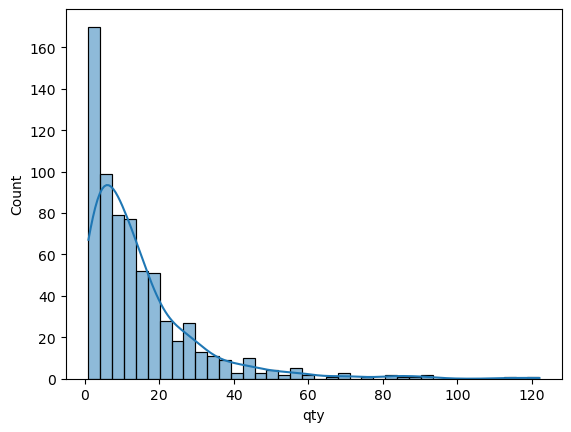

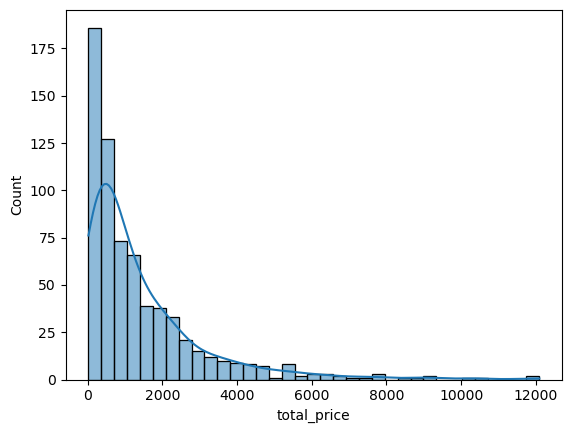

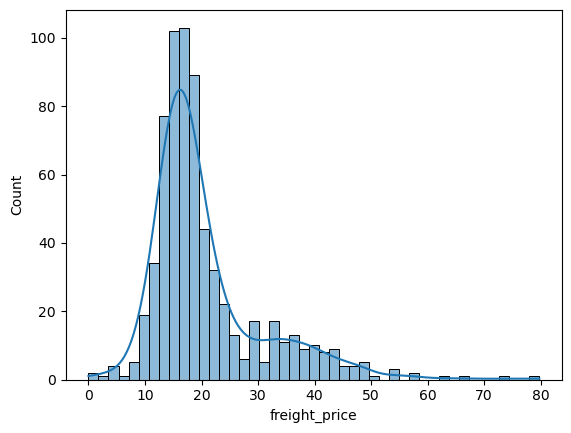

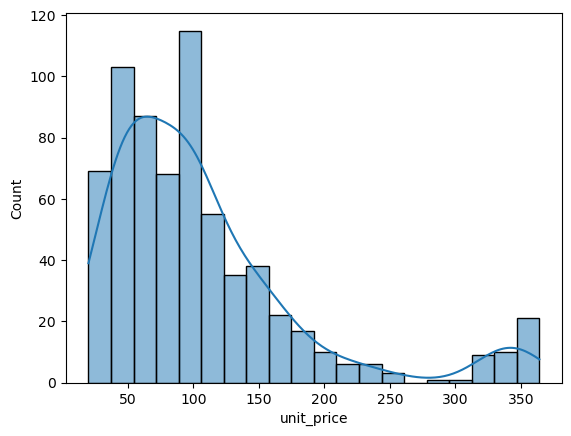

In [43]:
for col in ["qty", "total_price", "freight_price", "unit_price"]:
    sns.histplot(df[col],kde=True)
    plt.show()

In [47]:
print("SKEWNESS")
for col in ["qty", "total_price", "freight_price", "unit_price"]:
    print(f"{col} : {df[col].skew()}")

SKEWNESS
qty : 2.6735372986291748
total_price : 2.613958654543281
freight_price : 1.845972949920699
unit_price : 1.7787534169905064


In [48]:
print("KURTOSIS")
for col in ["qty", "total_price", "freight_price", "unit_price"]:
    print(f"{col} : {df[col].kurtosis()}")

KURTOSIS
qty : 10.252169660358746
total_price : 9.044129000108725
freight_price : 4.492302599186473
unit_price : 3.0817186634758613


**Checking Outliers - We expect higher number of outliers in columns with higher kurtosis**

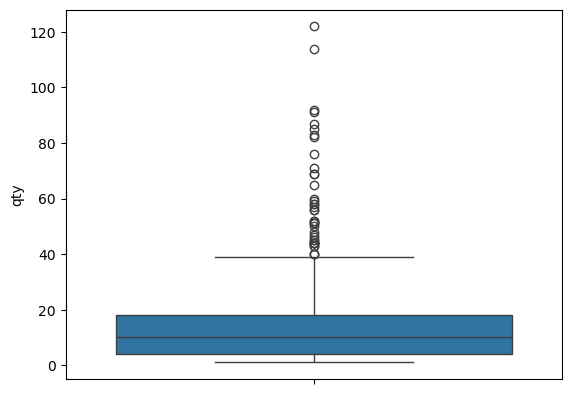

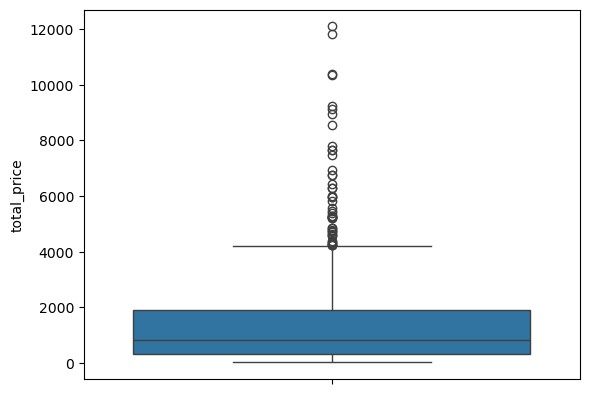

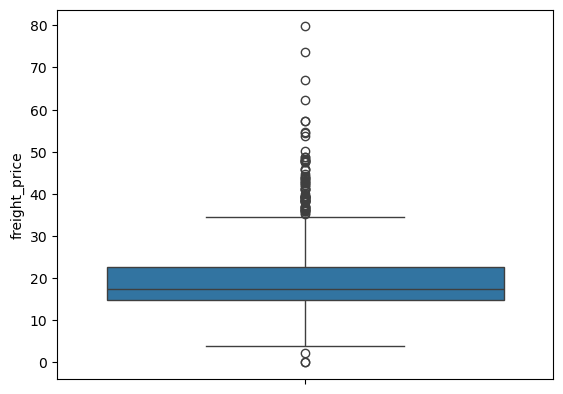

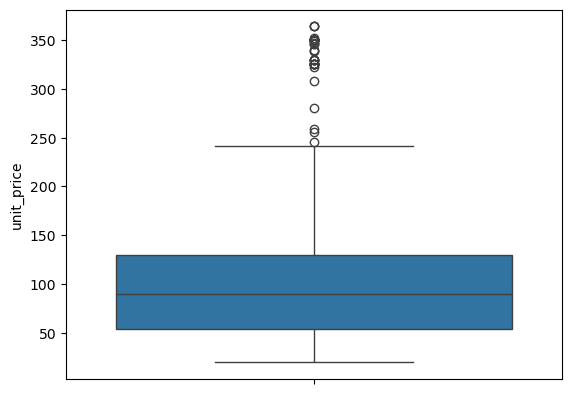

In [51]:
for col in ["qty", "total_price", "freight_price", "unit_price"]:
    sns.boxplot(df[col])
    plt.show()

In [55]:
# Function to calculate the number of outliers for each column
def count_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outlier_counts[column] = outliers
    return outlier_counts

# Get outlier counts
outlier_counts = count_outliers_iqr(df[["qty", "total_price", "freight_price", "unit_price"]])

# Print the outlier counts for each column
for column, count in outlier_counts.items():
    print(f"Column '{column}' has {count} outliers.")

Column 'qty' has 42 outliers.
Column 'total_price' has 46 outliers.
Column 'freight_price' has 76 outliers.
Column 'unit_price' has 45 outliers.


Counting the number of outliers using the IQR method reveals that the column(freight_price ) with less kurtosis showed highest number of outliers.

The other three columns, viz., qty, total_price, and unit_price had nearly 45 outliers each.

Column 'qty' has 42 outliers.

Column 'total_price' has 46 outliers.

Column 'freight_price' has 76 outliers.

Column 'unit_price' has 45 outliers.

## Bivariate Analysis

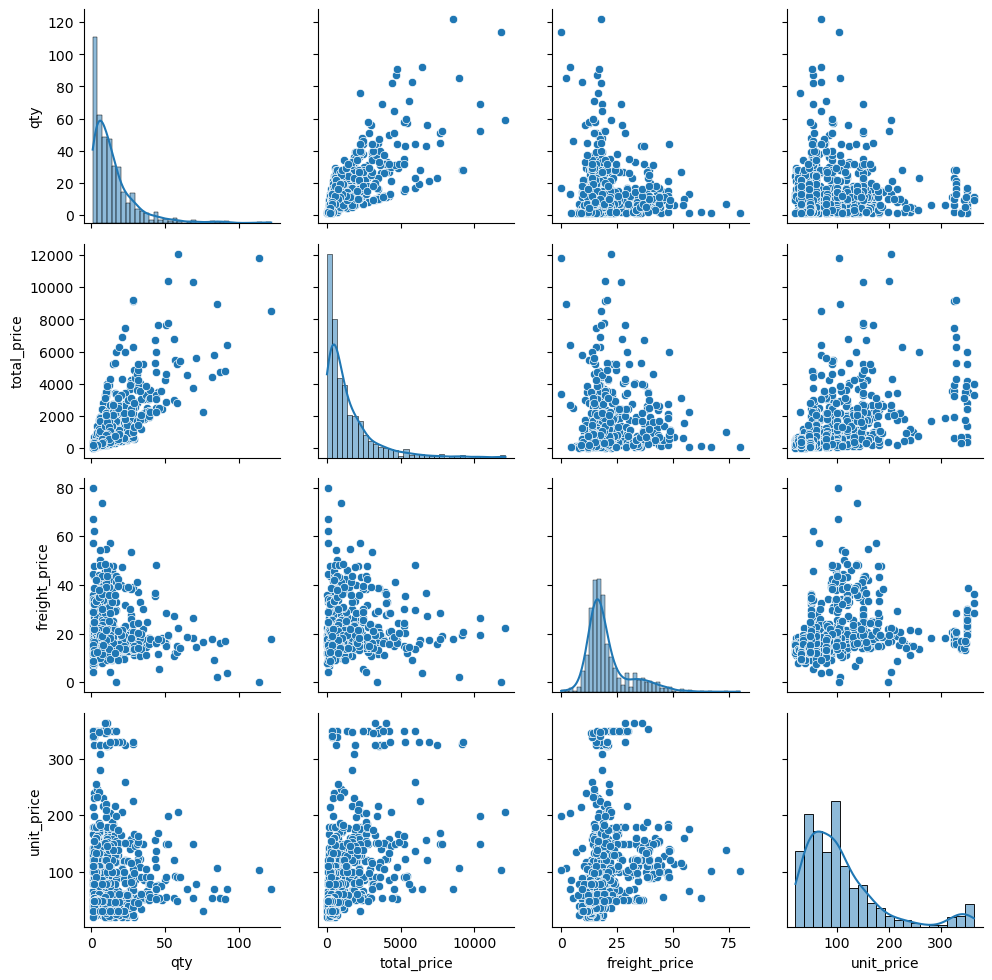

In [35]:
g = sns.PairGrid(df[["qty", "total_price", "freight_price", "unit_price"]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)

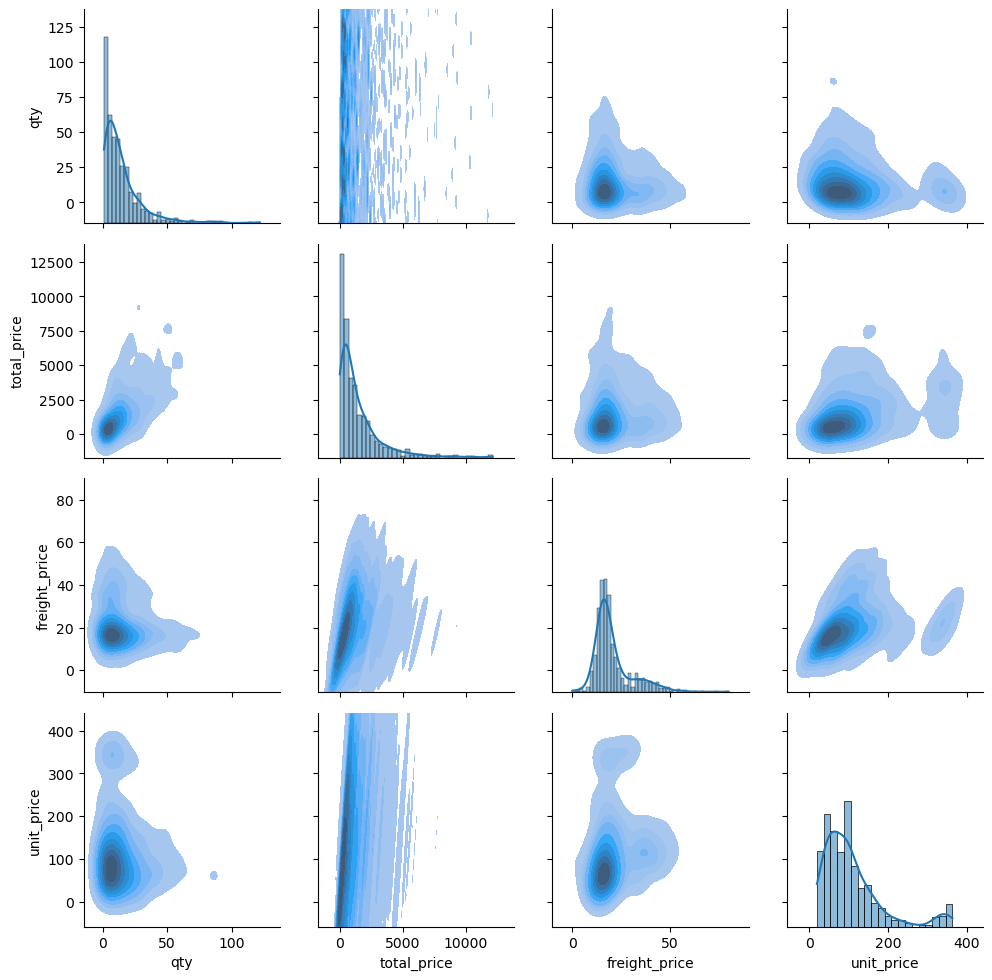

In [39]:
g = sns.PairGrid(df[["qty", "total_price", "freight_price", "unit_price"]])
g.map_upper(sns.kdeplot, fill=True)
g.map_lower(sns.kdeplot,fill=True)
g.map_diag(sns.histplot, kde=True)

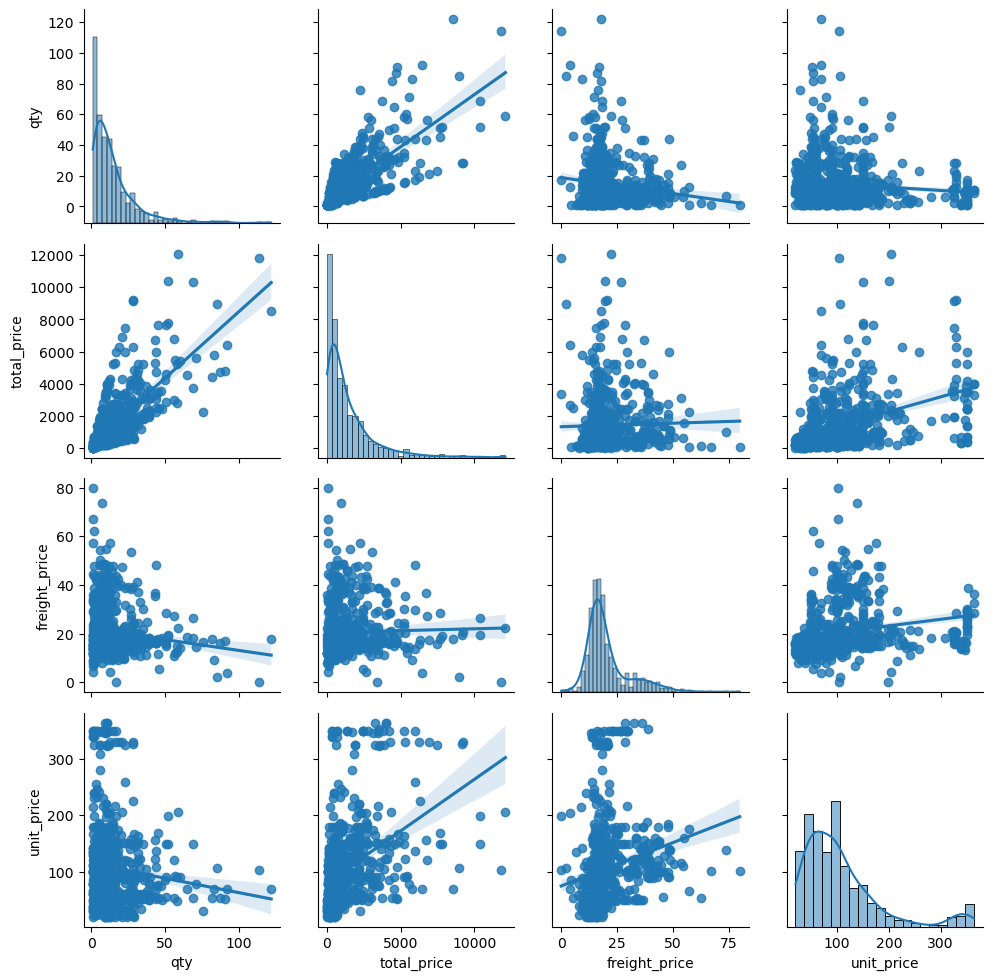

In [41]:
g = sns.PairGrid(df[["qty", "total_price", "freight_price", "unit_price"]])
g.map_upper(sns.regplot)
g.map_lower(sns.regplot)
g.map_diag(sns.histplot, kde=True)